In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import re 

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/zomato_restaurants_in_India.csv")

In [3]:
df.shape

(211944, 26)

In [4]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# Data Cleaning and Feature Engineering
# Drop unnecessary columns

In [153]:
df.drop(columns=['url'], inplace=True)

In [155]:
df.head(2)

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,QuickBites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,282001,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,QuickBites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1


# Removing Duplicates

In [8]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)

In [9]:
df.shape

(55568, 26)

# Checking and Handling Missing Values

In [10]:
df.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [11]:
# Using 'Latitude' and 'longitude' coloumn to fill in the missing addresses

In [12]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [13]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")

def reverse_geocode(lat, lon):
    location = geolocator.reverse((lat, lon), exactly_one=True)
    return location.address if location else None

for index, row in df.iterrows():
    if pd.isnull(row['address']):
        address = reverse_geocode(row['latitude'], row['longitude'])
        df.at[index, 'address'] = address

In [14]:
mode_timing = df['timings'].mode()[0]
df['timings'].fillna(mode_timing, inplace=True)

In [15]:
df['opentable_support'].fillna(0, inplace=True)

In [16]:
df['cuisines'].fillna('Various', inplace=True)

In [17]:
# Removing special, Non-numerical characters and handling invalid or incorrectly formatted values

In [18]:
def clean_zipcode(zipcode):
    zipcode = re.sub(r'\D', '', str(zipcode))
    if len(zipcode) == 6:
        return zipcode
    else:
        return None
df['zipcode'] = df['zipcode'].apply(clean_zipcode)

In [19]:
# Since there are many missing values in 'Zipcode' Coloumn, I'm creating a dictionary to map cities to zip codes then I am 
# going to use this mapping to fill in missing zip codes based on the city names.

In [20]:
city_zip_mapping = {
    'Agra': '282001',
    'Ahmedabad': '380001',
    'Gandhinagar': '382010',
    'Ajmer': '305001',
    'Alappuzha': '688001',
    'Allahabad': '211001',
    'Amravati': '444601',
    'Amritsar': '143001',
    'Aurangabad': '431001',
    'Bangalore': '560001',
    'Bhopal': '462001',
    'Bhubaneshwar': '751001',
    'Chandigarh': '160001',
    'Mohali': '160055',
    'Panchkula': '134109',
    'Zirakpur': '140603',
    'Nayagaon': '160103',
    'Chennai': '600001',
    'Coimbatore': '641001',
    'Cuttack': '753001',
    'Darjeeling': '734101',
    'Dehradun': '248001',
    'New Delhi': '110001',
    'Gurgaon': '122001',
    'Noida': '201301',
    'Faridabad': '121001',
    'Ghaziabad': '201001',
    'Greater Noida': '201310',
    'Dharamshala': '176215',
    'Gangtok': '737101',
    'Goa': '403001',
    'Gorakhpur': '273001',
    'Guntur': '522001',
    'Guwahati': '781001',
    'Gwalior': '474001',
    'Haridwar': '249401',
    'Hyderabad': '500001',
    'Secunderabad': '500003',
    'Indore': '452001',
    'Jabalpur': '482001',
    'Jaipur': '302001',
    'Jalandhar': '144001',
    'Jammu': '180001',
    'Jamnagar': '361001',
    'Jamshedpur': '831001',
    'Jhansi': '284001',
    'Jodhpur': '342001',
    'Junagadh': '362001',
    'Kanpur': '208001',
    'Kharagpur': '721301',
    'Kochi': '682001',
    'Kolhapur': '416001',
    'Kolkata': '700001',
    'Howrah': '711101',
    'Kota': '324001',
    'Lucknow': '226001',
    'Ludhiana': '141001',
    'Madurai': '625001',
    'Manali': '175131',
    'Mangalore': '575001',
    'Manipal': '576104',
    'Udupi': '576101',
    'Meerut': '250001',
    'Mumbai': '400001',
    'Thane': '400601',
    'Navi Mumbai': '400703',
    'Mussoorie': '248179',
    'Mysore': '570001',
    'Nagpur': '440001',
    'Nainital': '263001',
    'Nasik': '422001',
    'Nashik': '422001',
    'Neemrana': '301705',
    'Ooty': '643001',
    'Palakkad': '678001',
    'Patiala': '147001',
    'Patna': '800001',
    'Puducherry': '605001',
    'Pune': '411001',
    'Pushkar': '305022',
    'Raipur': '492001',
    'Rajkot': '360001',
    'Ranchi': '834001',
    'Rishikesh': '249201',
    'Salem': '636001',
    'Shimla': '171001',
    'Siliguri': '734001',
    'Srinagar': '190001',
    'Surat': '395001',
    'Thrissur': '680001',
    'Tirupati': '517501',
    'Trichy': '620001',
    'Trivandrum': '695001',
    'Udaipur': '313001',
    'Varanasi': '221001',
    'Vellore': '632001',
    'Vijayawada': '520001',
    'Vizag': '530001',
    'Vadodara': '390001'
}

for city, zipcode in city_zip_mapping.items():
    print(f"{city}: {zipcode}")


Agra: 282001
Ahmedabad: 380001
Gandhinagar: 382010
Ajmer: 305001
Alappuzha: 688001
Allahabad: 211001
Amravati: 444601
Amritsar: 143001
Aurangabad: 431001
Bangalore: 560001
Bhopal: 462001
Bhubaneshwar: 751001
Chandigarh: 160001
Mohali: 160055
Panchkula: 134109
Zirakpur: 140603
Nayagaon: 160103
Chennai: 600001
Coimbatore: 641001
Cuttack: 753001
Darjeeling: 734101
Dehradun: 248001
New Delhi: 110001
Gurgaon: 122001
Noida: 201301
Faridabad: 121001
Ghaziabad: 201001
Greater Noida: 201310
Dharamshala: 176215
Gangtok: 737101
Goa: 403001
Gorakhpur: 273001
Guntur: 522001
Guwahati: 781001
Gwalior: 474001
Haridwar: 249401
Hyderabad: 500001
Secunderabad: 500003
Indore: 452001
Jabalpur: 482001
Jaipur: 302001
Jalandhar: 144001
Jammu: 180001
Jamnagar: 361001
Jamshedpur: 831001
Jhansi: 284001
Jodhpur: 342001
Junagadh: 362001
Kanpur: 208001
Kharagpur: 721301
Kochi: 682001
Kolhapur: 416001
Kolkata: 700001
Howrah: 711101
Kota: 324001
Lucknow: 226001
Ludhiana: 141001
Madurai: 625001
Manali: 175131
Mangalor

In [21]:
df['zipcode'].fillna(df['city'].map(city_zip_mapping), inplace=True)

In [22]:
df["zipcode"].unique()

array(['282001', '380054', '380001', '380015', '380006', '380009',
       '380014', '380059', '380008', '382421', '382010', '380057',
       '382424', '382350', '380024', '380013', '380051', '380027',
       '382481', '380005', '380052', '380003', '380058', '380007',
       '382415', '380061', '380060', '380055', '382480', '382016',
       '382418', '382735', '382470', '305001', '305004', '305005',
       '305927', '688001', '211001', '444601', '143001', '431001',
       '560001', '560008', '560095', '560035', '560037', '560025',
       '560100', '560029', '560048', '500035', '560041', '560078',
       '560011', '560102', '560034', '560038', '560069', '560071',
       '560066', '560024', '560076', '560052', '560077', '560017',
       '560045', '560042', '560103', '560054', '560092', '560036',
       '560049', '560032', '560075', '560043', '560040', '560064',
       '560105', '560068', '560067', '560010', '560057', '560004',
       '560005', '560098', '560094', '560022', '560070', '5600

# Dealing with special characters in the dataframe

In [23]:
df["establishment"]

0             ['Quick Bites']
1             ['Quick Bites']
2             ['Quick Bites']
3             ['Quick Bites']
4           ['Casual Dining']
                 ...         
211882    ['Dessert Parlour']
211925      ['Casual Dining']
211926      ['Casual Dining']
211940        ['Quick Bites']
211942        ['Quick Bites']
Name: establishment, Length: 55568, dtype: object

In [24]:
df['establishment'] = df['establishment'].str.replace(r'\[|\]|\W', '', regex=True)
print(df)

          res_id                            name   establishment  \
0        3400299                     Bikanervala      QuickBites   
1        3400005  Mama Chicken Mama Franky House      QuickBites   
2        3401013                   Bhagat Halwai      QuickBites   
3        3400290                   Bhagat Halwai      QuickBites   
4        3401744     The Salt Cafe Kitchen & Bar    CasualDining   
...          ...                             ...             ...   
211882  19142822           Shree Janta Ice Cream  DessertParlour   
211925  18984164                The Grand Thakar    CasualDining   
211926  18019952                     Geeta lodge    CasualDining   
211940   3200996                      Raju Omlet      QuickBites   
211942   3201138                          Subway      QuickBites   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   


In [25]:
df["timings"]

0                                8:30am – 10:30pm (Mon-Sun)
1         12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
2                                          9:30 AM to 11 PM
3                                      8am – 11pm (Mon-Sun)
4                                      11:30 AM to 11:30 PM
                                ...                        
211882                                 11 AM to 12 Midnight
211925                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211926                   11 AM to 3:30 PM, 7 PM to 10:30 PM
211940    4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
211942                                         8 AM to 1 AM
Name: timings, Length: 55568, dtype: object

In [26]:
def clean_timings(timings_str):
    cleaned_timings = re.sub(r'[^a-zA-Z0-9\s:]', '', timings_str)
    return cleaned_timings

df['timings'] = df['timings'].apply(clean_timings)
print(df['timings'])

0                                    8:30am  10:30pm MonSun
1         12:30PM to 12Midnight Mon Wed Thu Fri Sat Sun ...
2                                          9:30 AM to 11 PM
3                                          8am  11pm MonSun
4                                      11:30 AM to 11:30 PM
                                ...                        
211882                                 11 AM to 12 Midnight
211925                 11:30 AM to 3:30 PM 7:30 PM to 11 PM
211926                    11 AM to 3:30 PM 7 PM to 10:30 PM
211940    4pm  11pm Mon Tue Wed Fri Sat Sun 4pm  11:30pm...
211942                                         8 AM to 1 AM
Name: timings, Length: 55568, dtype: object


In [27]:
df["highlights"]

0         ['Lunch', 'Takeaway Available', 'Credit Card',...
1         ['Delivery', 'No Alcohol Available', 'Dinner',...
2         ['No Alcohol Available', 'Dinner', 'Takeaway A...
3         ['Takeaway Available', 'Credit Card', 'Lunch',...
4         ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                ...                        
211882    ['Cash', 'Takeaway Available', 'Delivery', 'In...
211925    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
211926    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
211940    ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
211942    ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object

In [28]:
def clean_highlights(highlights_str):
    cleaned_str = highlights_str.strip("[]").replace("'", "")
    return cleaned_str

df['highlights'] = df['highlights'].apply(clean_highlights)
print(df['highlights'])

0         Lunch, Takeaway Available, Credit Card, Dinner...
1         Delivery, No Alcohol Available, Dinner, Takeaw...
2         No Alcohol Available, Dinner, Takeaway Availab...
3         Takeaway Available, Credit Card, Lunch, Delive...
4         Lunch, Serves Alcohol, Cash, Credit Card, Dinn...
                                ...                        
211882    Cash, Takeaway Available, Delivery, Indoor Sea...
211925    Dinner, Cash, Debit Card, Lunch, Takeaway Avai...
211926    Dinner, Cash, Credit Card, Lunch, Takeaway Ava...
211940    Dinner, Cash, Takeaway Available, Debit Card, ...
211942    Dinner, Delivery, Credit Card, Lunch, Cash, Ta...
Name: highlights, Length: 55568, dtype: object


In [29]:
df["rating_text"].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'İyi', 'Çok iyi', 'Baik',
       'Sangat Baik', 'Skvělé', 'Muy Bueno', 'Průměr', 'Ortalama',
       'Skvělá volba', 'Muito bom', 'Velmi dobré', 'Excelente', 'Bom',
       'Scarso', 'Promedio', 'Vynikajúce', 'Bueno', 'Dobré', 'Terbaik',
       'Harika', 'Veľmi dobré', 'Eccellente', 'Buono', 'Média', 'Dobrze'],
      dtype=object)

In [30]:
values_to_keep = ['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor']
rows_to_fill = df[~df['rating_text'].isin(values_to_keep)]

for index, row in rows_to_fill.iterrows():
    aggregate_rating = row['aggregate_rating']
    if 4.5 <= aggregate_rating <= 4.9:
        df.at[index, 'rating_text'] = 'Excellent'
    elif 4.0 <= aggregate_rating < 4.5:
        df.at[index, 'rating_text'] = 'Very Good'
    elif 3.5 <= aggregate_rating < 4.0:
        df.at[index, 'rating_text'] = 'Good'
    elif 2.5 <= aggregate_rating < 3.5:
        df.at[index, 'rating_text'] = 'Average'
    elif 1.8 <= aggregate_rating < 2.5:
        df.at[index, 'rating_text'] = 'Poor'
    elif aggregate_rating == 0.0:
        df.at[index, 'rating_text'] = 'Not rated'

In [31]:
df["rating_text"].value_counts()

rating_text
Average      16323
Good         16050
Very Good    10940
Not rated    10058
Excellent     1621
Poor           576
Name: count, dtype: int64

# Datatypes

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 0 to 211942
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55568 non-null  int64  
 1   name                  55568 non-null  object 
 2   establishment         55568 non-null  object 
 3   url                   55568 non-null  object 
 4   address               55568 non-null  object 
 5   city                  55568 non-null  object 
 6   city_id               55568 non-null  int64  
 7   locality              55568 non-null  object 
 8   latitude              55568 non-null  float64
 9   longitude             55568 non-null  float64
 10  zipcode               55568 non-null  object 
 11  country_id            55568 non-null  int64  
 12  locality_verbose      55568 non-null  object 
 13  cuisines              55568 non-null  object 
 14  timings               55568 non-null  object 
 15  average_cost_for_two  5

# Exploratory Data Analysis

In [33]:
number_of_resturants = df['name'].nunique()
print("Total number of resturants =", number_of_resturants)

Total number of resturants = 41100


In [34]:
outlets = df["name"].value_counts()
print(outlets)

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64


In [35]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [36]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [37]:
single

name
Bombay Baking Company - JW Marriott Mumbai Juhu    1
Vaidehi Restaurant                                 1
Plazzo Resorts And Restaurant                      1
Shashwat Food Zone                                 1
Candy Kisses                                       1
                                                  ..
Boulevard 69                                       1
7-Eleven Restaurant                                1
Food station                                       1
Silver Saloon - Taj Usha Kiran Palace              1
Geeta lodge                                        1
Name: count, Length: 36210, dtype: int64

In [38]:
top10_chains = chains.head(10)

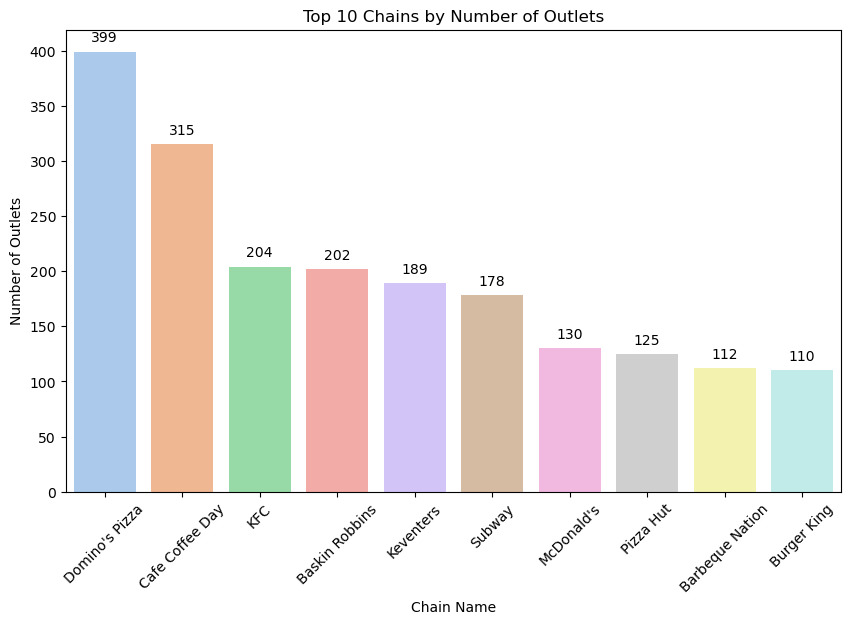

In [39]:
colors = sns.color_palette("pastel", len(top10_chains))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top10_chains.index, y=top10_chains.values, palette=colors)

plt.title('Top 10 Chains by Number of Outlets')
plt.xlabel('Chain Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

In [40]:
number_of_cities = df['city'].nunique()
print("Total number of cities =", number_of_cities)

Total number of cities = 99


In [146]:
restaurant_counts_all = df['city'].value_counts()

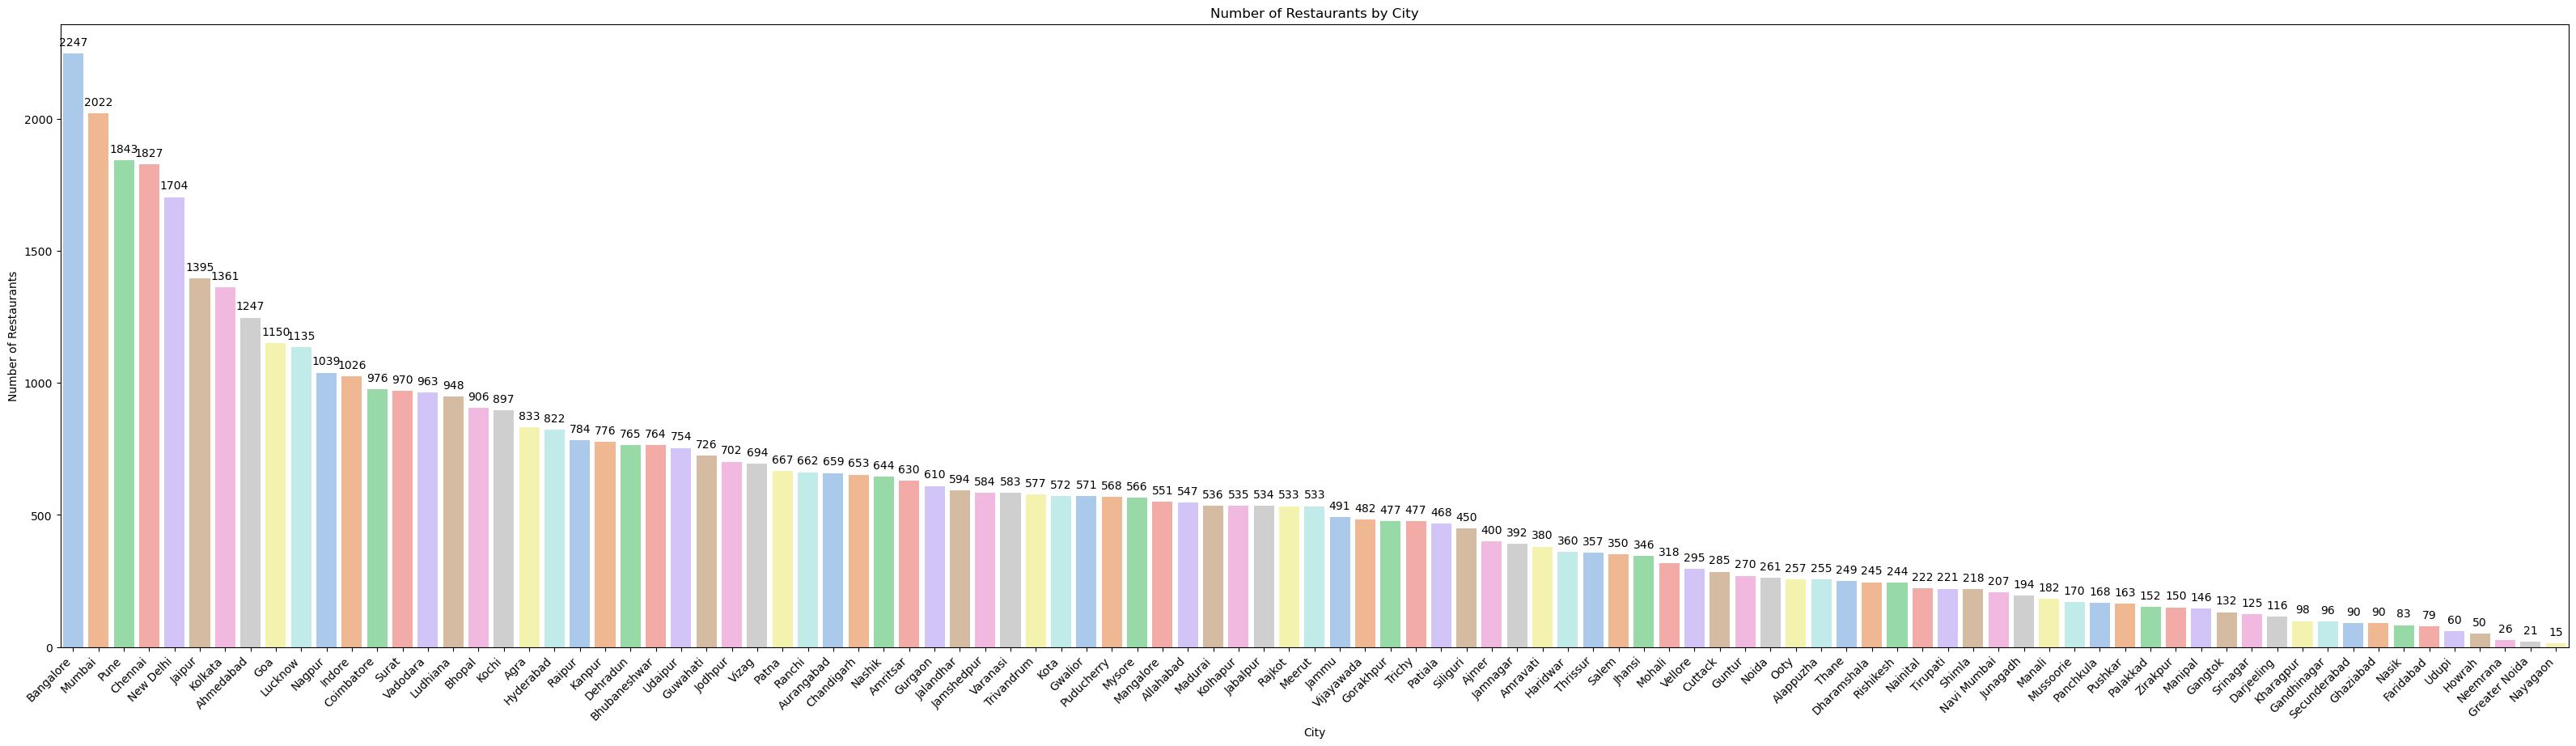

In [151]:
restaurant_counts = df['city'].value_counts()

colors = sns.color_palette("pastel", len(restaurant_counts))

plt.figure(figsize=(40, 10))
ax = sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette=colors)
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

In [43]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [44]:
cuisine_outlets = df['cuisines'].str.split(', ').explode().value_counts()
top10_cuisines = cuisine_outlets.head(10)

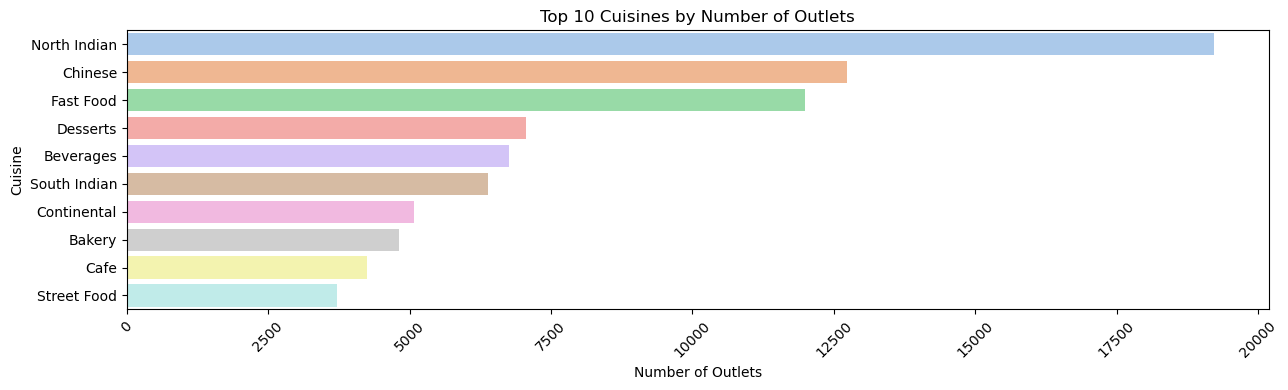

In [45]:
colors = sns.color_palette("pastel", len(top10_cuisines))

plt.figure(figsize=(13, 4))
sns.barplot(x=top10_cuisines.values, y=top10_cuisines.index, palette=colors)

plt.title('Top 10 Cuisines by Number of Outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Cuisine')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [46]:
highlights = []
for value in df['highlights']:
    highlights.extend([highlight.strip() for highlight in value.split(',')])

highlights_series = pd.Series(highlights)
total_unique_highlights = highlights_series.nunique()
print("Total number of unique highlights =", total_unique_highlights)

Total number of unique highlights = 104


In [47]:
top10_establishments = df['establishment'].value_counts().nlargest(10).index
df_top10 = df[df['establishment'].isin(top10_establishments)]

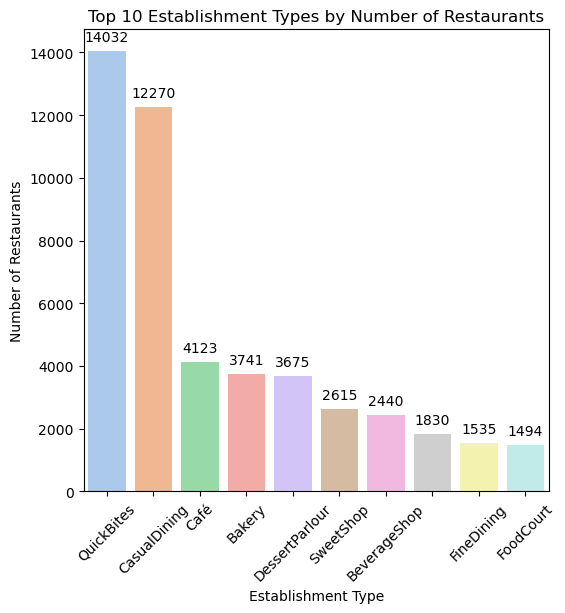

In [48]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df_top10, x='establishment', order=top10_establishments, palette='pastel')
plt.title('Top 10 Establishment Types by Number of Restaurants')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

In [49]:
df["price_range"].unique()

array([2, 1, 3, 4], dtype=int64)

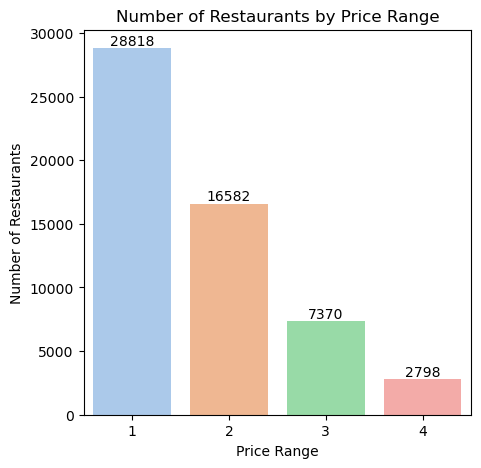

In [50]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='price_range', palette='pastel')
plt.title('Number of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

In [51]:
df["currency"].unique()

array(['Rs.'], dtype=object)

In [52]:
df["opentable_support"].unique()

array([0.])

In [53]:
df["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [54]:
df["takeaway"].unique()

array([-1], dtype=int64)

In [55]:
df[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


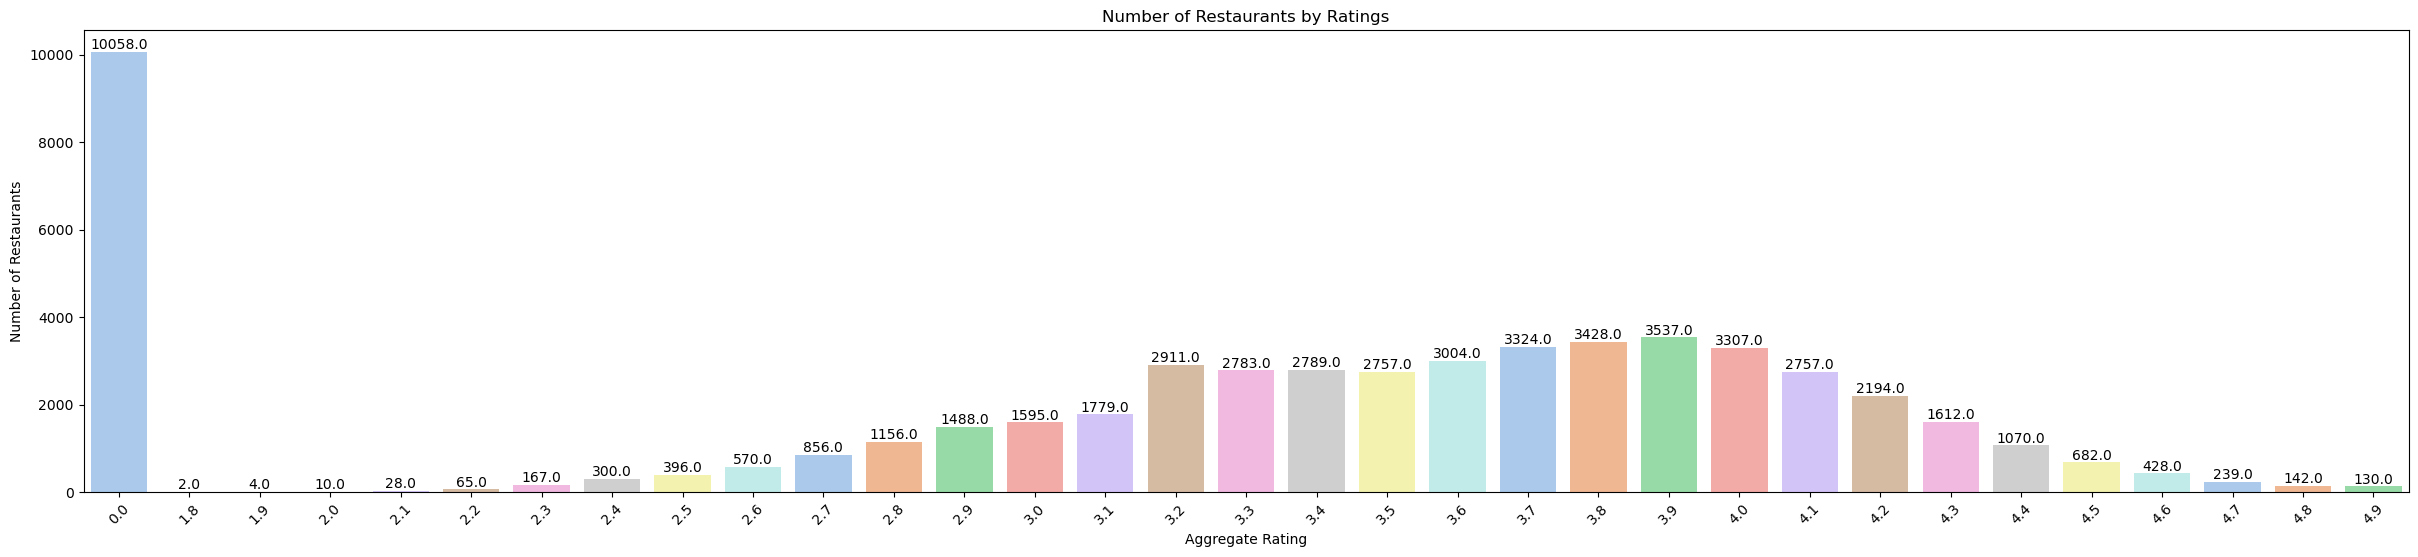

In [56]:
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='aggregate_rating', palette='pastel')

plt.title('Number of Restaurants by Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

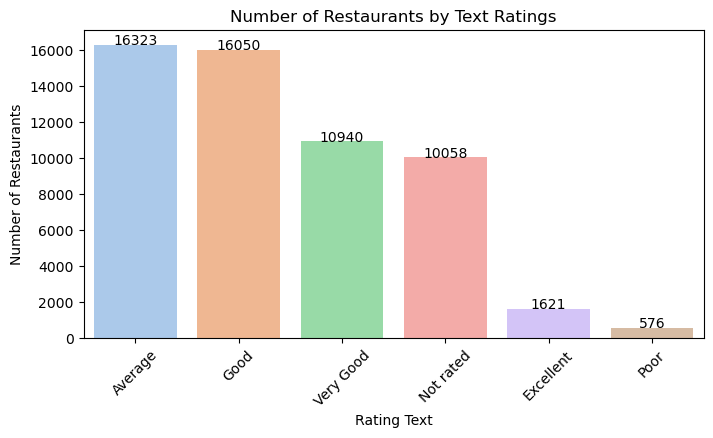

In [57]:
rating_counts = df['rating_text'].value_counts()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Number of Restaurants by Text Ratings')
plt.xlabel('Rating Text')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)

for i, val in enumerate(rating_counts.values):
    ax.text(i, val + 0.5, str(val), ha='center')

plt.show()

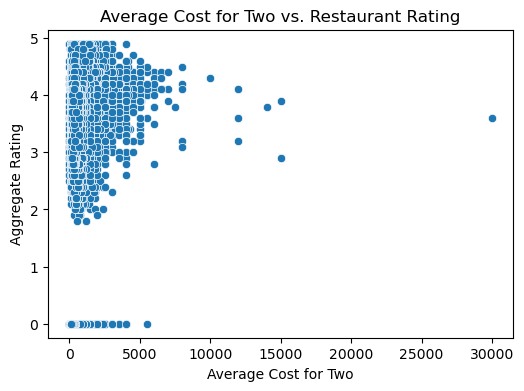

Correlation coefficient: 0.2500445523821827


In [58]:
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df)
plt.title('Average Cost for Two vs. Restaurant Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()

correlation = df['average_cost_for_two'].corr(df['aggregate_rating'])
print("Correlation coefficient:", correlation)

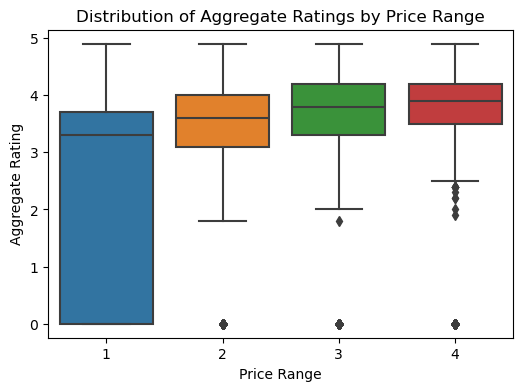

ANOVA F-statistic: 1368.3170217336417
ANOVA p-value: 0.0


In [59]:
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

plt.figure(figsize=(6, 4))
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Distribution of Aggregate Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()
from scipy.stats import f_oneway

price_range_groups = [group['aggregate_rating'].dropna() for name, group in df.groupby('price_range')]
f_statistic, p_value = f_oneway(*price_range_groups)
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


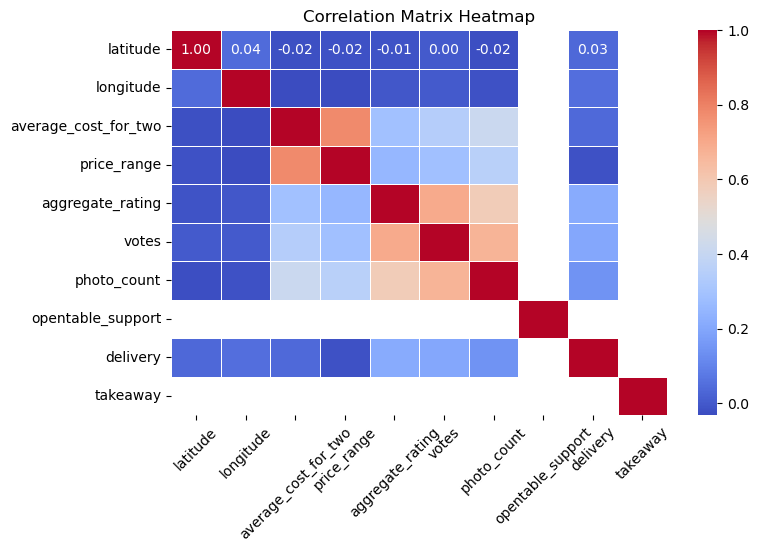

In [145]:
numeric_columns = ['latitude', 'longitude', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes', 'photo_count', 'opentable_support', 'delivery', 'takeaway']
corr = df[numeric_columns].corr(method='kendall')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# Regional Analysis

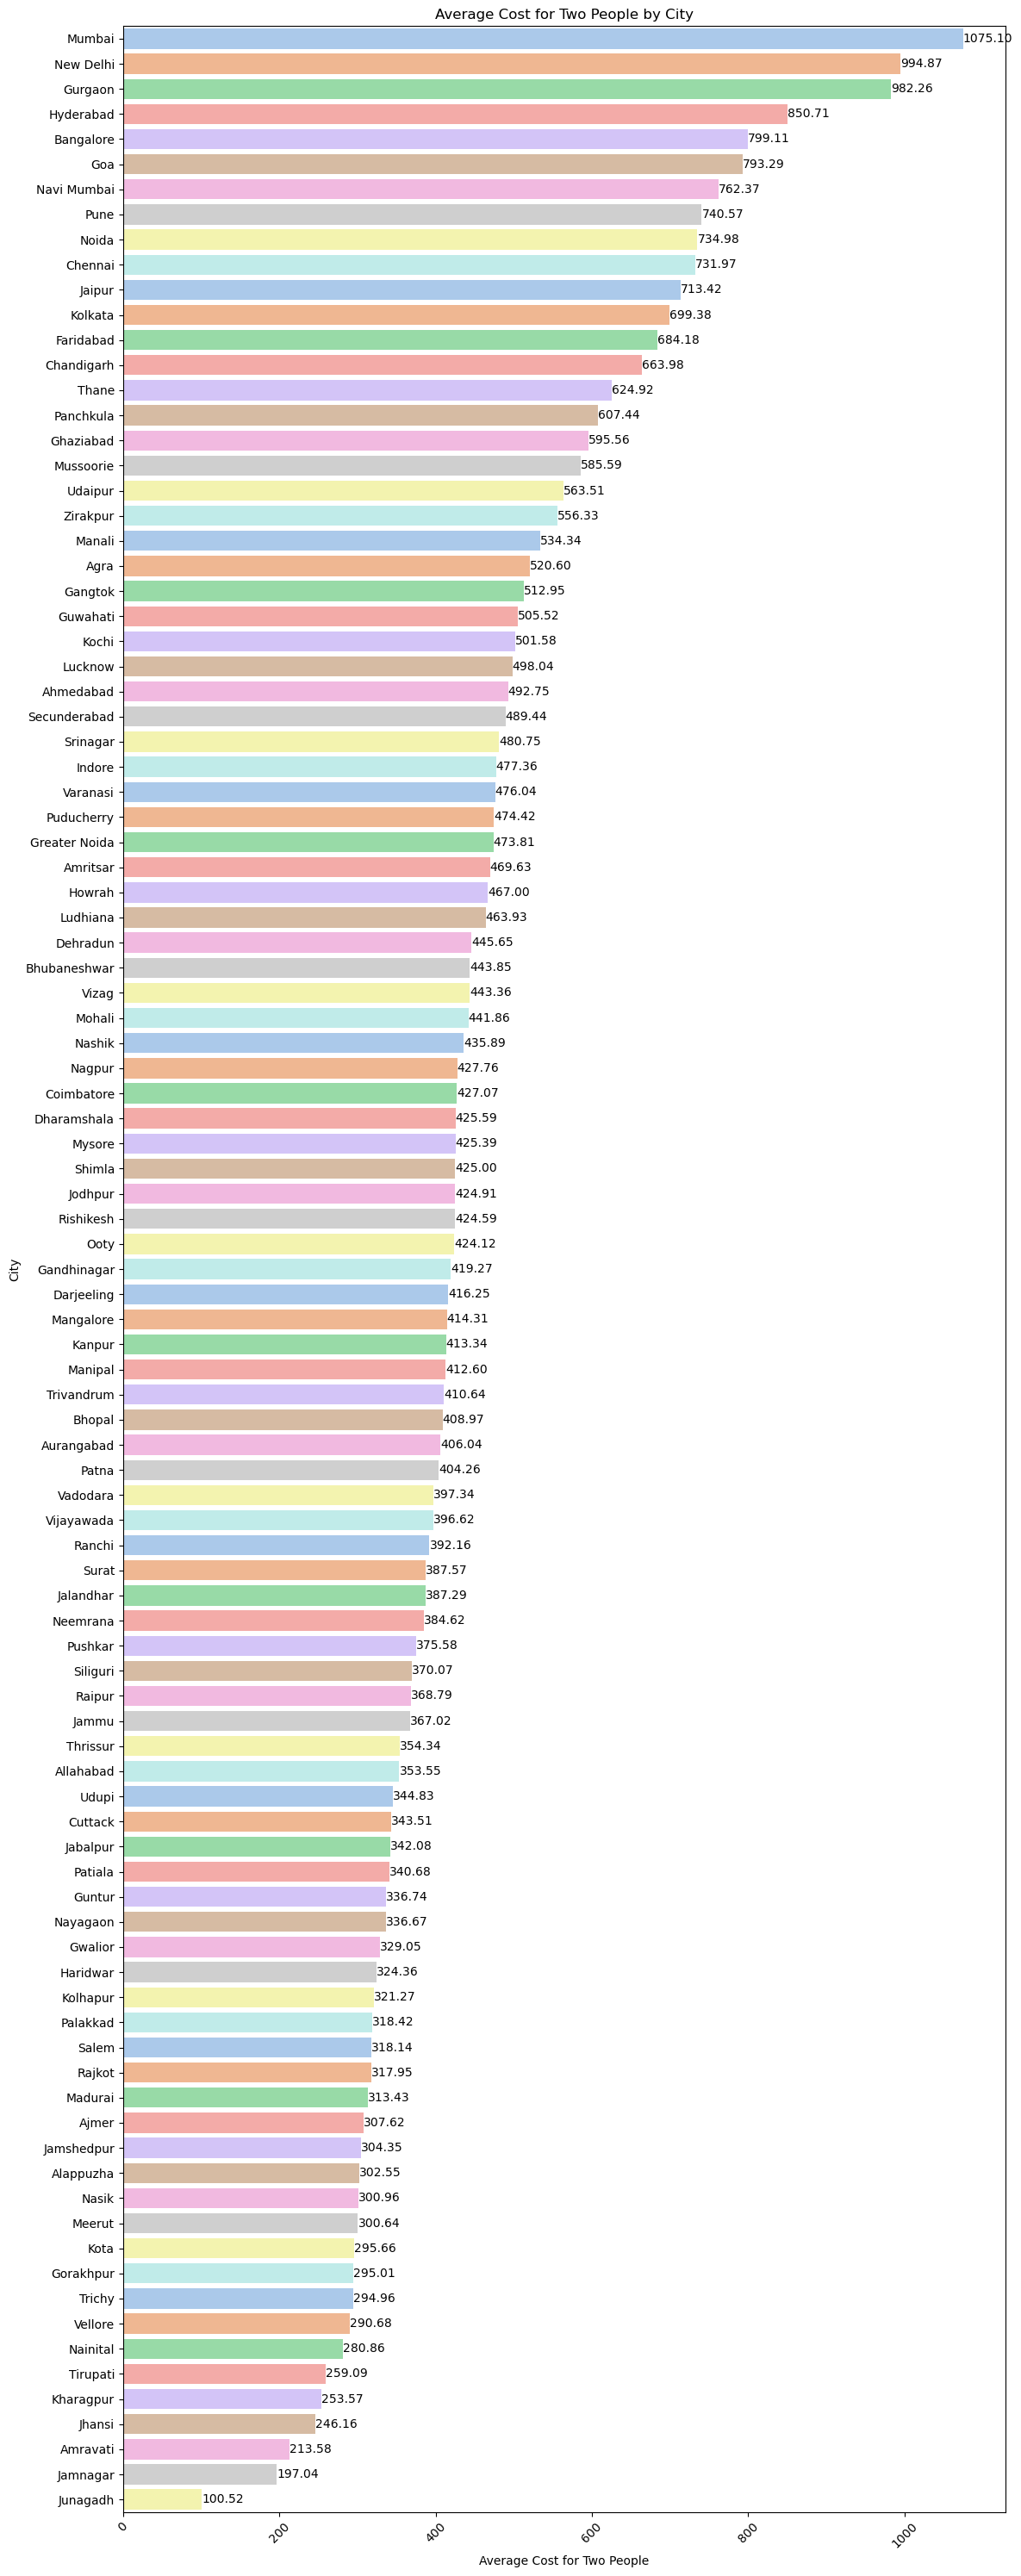

In [157]:
# The average cost for two people across different cities 
avg_cost_by_city = df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 30))
sns.barplot(x='average_cost_for_two', y='city', data=avg_cost_by_city, palette='pastel')

plt.title('Average Cost for Two People by City')
plt.xlabel('Average Cost for Two People')
plt.ylabel('City')
plt.xticks(rotation=45)

for index, value in enumerate(avg_cost_by_city['average_cost_for_two']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


In [61]:
# Identify areas with higher-rated restaurants.
grouped_by_city = df.groupby('city')

average_ratings_by_city = grouped_by_city['aggregate_rating'].mean()
sorted_ratings = average_ratings_by_city.sort_values(ascending=False)

print("Cities or regions with higher-rated restaurants:")
for city, avg_rating in sorted_ratings.items():
    print(f"{city}: {avg_rating:.2f}")

Cities or regions with higher-rated restaurants:
Gurgaon: 3.83
Secunderabad: 3.82
Hyderabad: 3.76
Kolkata: 3.75
New Delhi: 3.73
Mumbai: 3.71
Bangalore: 3.70
Noida: 3.62
Chennai: 3.60
Pune: 3.51
Ghaziabad: 3.49
Chandigarh: 3.47
Navi Mumbai: 3.47
Thane: 3.44
Jaipur: 3.44
Greater Noida: 3.41
Howrah: 3.32
Lucknow: 3.31
Vadodara: 3.27
Faridabad: 3.26
Ahmedabad: 3.21
Indore: 3.21
Surat: 3.17
Vizag: 3.16
Tirupati: 3.16
Panchkula: 3.14
Mohali: 3.11
Guwahati: 3.11
Ludhiana: 3.07
Bhubaneshwar: 3.07
Manipal: 3.06
Mysore: 3.03
Goa: 3.03
Varanasi: 3.02
Kochi: 3.01
Vijayawada: 3.00
Mangalore: 2.99
Kanpur: 2.99
Guntur: 2.97
Patna: 2.95
Nagpur: 2.94
Madurai: 2.89
Jhansi: 2.88
Jalandhar: 2.88
Amritsar: 2.88
Kota: 2.87
Patiala: 2.87
Gandhinagar: 2.85
Bhopal: 2.84
Cuttack: 2.82
Nashik: 2.80
Zirakpur: 2.80
Dehradun: 2.80
Coimbatore: 2.80
Raipur: 2.78
Aurangabad: 2.77
Jabalpur: 2.73
Allahabad: 2.73
Udaipur: 2.72
Gwalior: 2.71
Jodhpur: 2.71
Puducherry: 2.70
Rajkot: 2.69
Ranchi: 2.67
Agra: 2.66
Jammu: 2.65
A

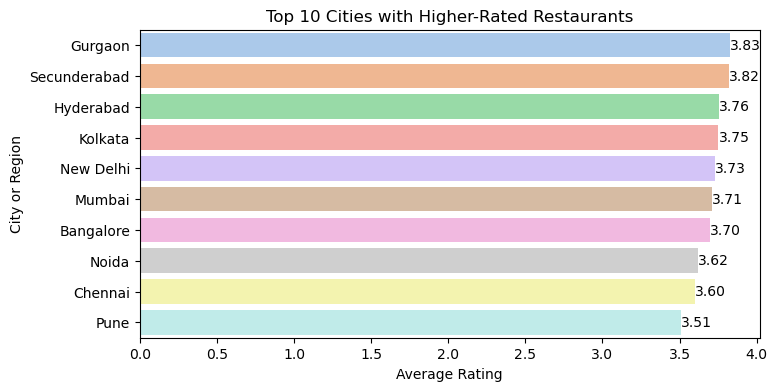

In [62]:
grouped_by_city = df.groupby('city')
average_ratings_by_city = grouped_by_city['aggregate_rating'].mean()
top_10_ratings = average_ratings_by_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_10_ratings.values, y=top_10_ratings.index, palette="pastel")

for i, value in enumerate(top_10_ratings.values):
    ax.text(value, i, f'{value:.2f}', va='center')

plt.title('Top 10 Cities with Higher-Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('City or Region')
plt.show()

In [63]:
grouped_by_city = df.groupby('city')
total_votes_by_city = grouped_by_city['votes'].sum()

sorted_votes = total_votes_by_city.sort_values(ascending=False)

print("Cities with the highest total number of votes for restaurants:")
for city, total_votes in sorted_votes.items():
    print(f"{city}: {total_votes}")

Cities with the highest total number of votes for restaurants:
Bangalore: 1628941
Mumbai: 1611854
New Delhi: 1211742
Pune: 876744
Kolkata: 837977
Hyderabad: 785462
Chennai: 622530
Gurgaon: 374040
Jaipur: 367554
Ahmedabad: 342386
Lucknow: 218962
Indore: 191211
Chandigarh: 181538
Nagpur: 174187
Ludhiana: 150531
Noida: 134564
Vadodara: 133706
Goa: 121992
Bhubaneshwar: 121651
Vizag: 104418
Kochi: 99314
Thane: 98115
Surat: 97950
Bhopal: 93767
Navi Mumbai: 91772
Secunderabad: 85989
Kanpur: 78842
Patna: 75164
Guwahati: 74410
Coimbatore: 70482
Mohali: 67616
Amritsar: 58409
Agra: 57620
Mysore: 56008
Mangalore: 52949
Dehradun: 50810
Ranchi: 48873
Puducherry: 46264
Varanasi: 45781
Raipur: 44486
Jalandhar: 43549
Udaipur: 42939
Kota: 42304
Aurangabad: 40391
Vijayawada: 38529
Gwalior: 36147
Panchkula: 36040
Allahabad: 33401
Ghaziabad: 33238
Jodhpur: 33057
Patiala: 31616
Nashik: 30894
Guntur: 27270
Faridabad: 24148
Jammu: 23008
Madurai: 21448
Rajkot: 20477
Jamshedpur: 20393
Cuttack: 19716
Jabalpur: 1

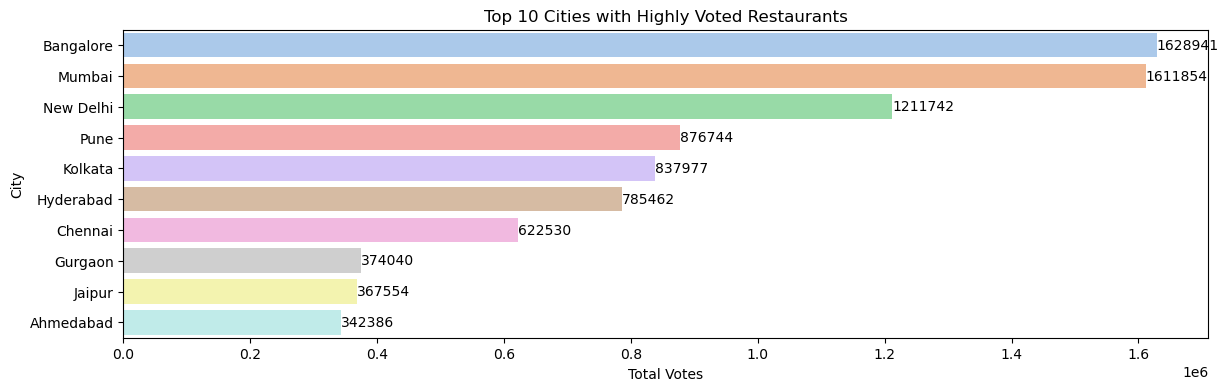

In [64]:
grouped_by_city = df.groupby('city')
total_votes_by_city = grouped_by_city['votes'].sum()
top_10_votes = total_votes_by_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 4))
ax = sns.barplot(x=top_10_votes.values, y=top_10_votes.index, palette="pastel")

for i, value in enumerate(top_10_votes.values):
    ax.text(value, i, f'{value}', va='center')

plt.title('Top 10 Cities with Highly Voted Restaurants')
plt.xlabel('Total Votes')
plt.ylabel('City')
plt.show()

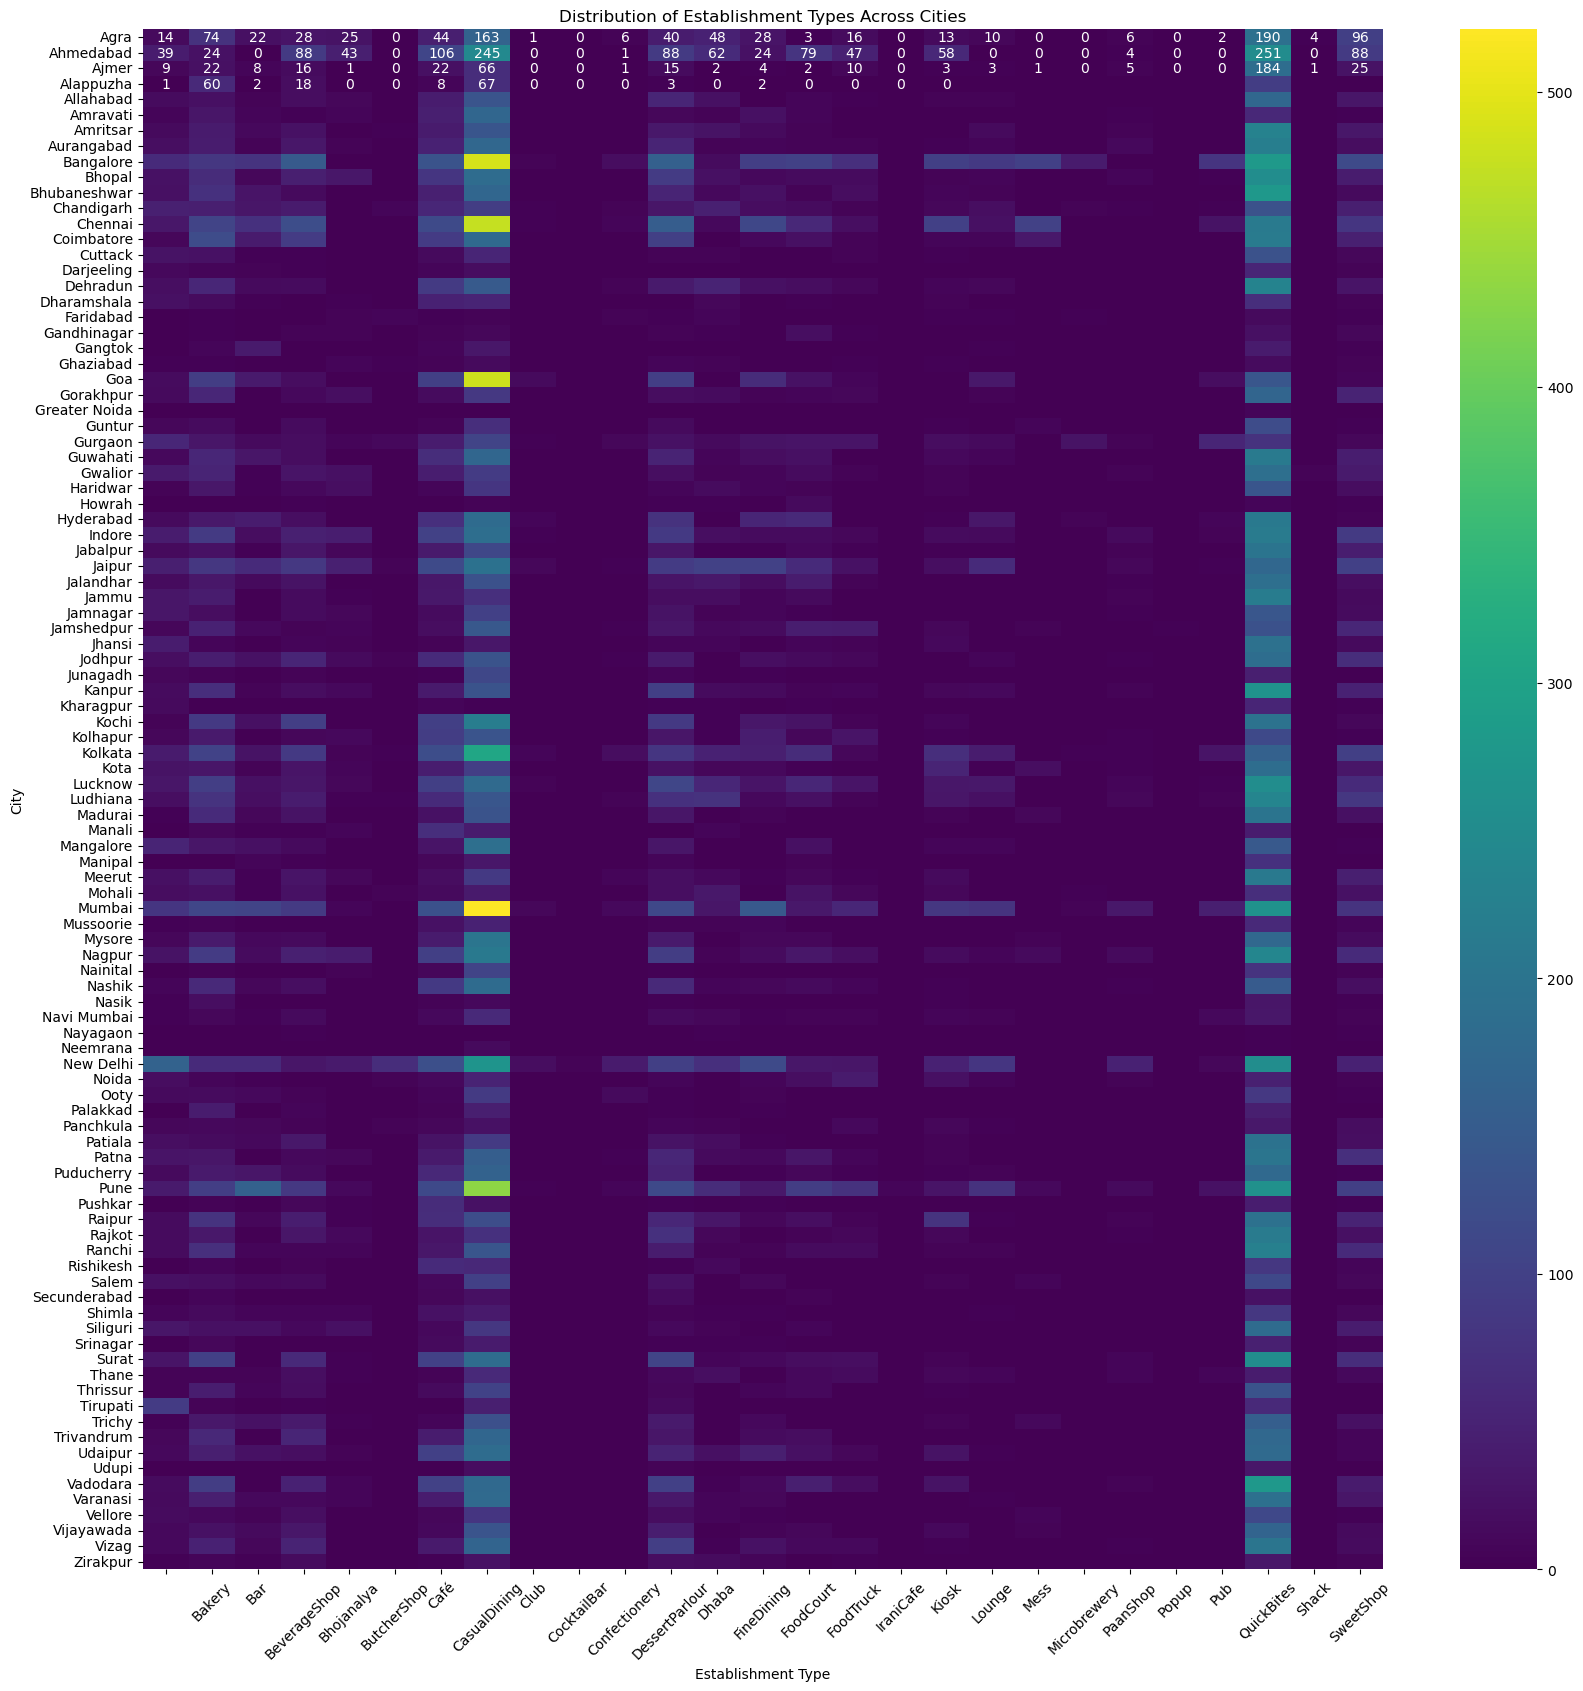

In [65]:
city_establishment_counts = df.groupby(['city', 'establishment']).size().reset_index(name='count')

pivot_df = city_establishment_counts.pivot(index='city', columns='establishment', values='count').fillna(0)

plt.figure(figsize=(20, 20))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='g')
plt.title('Distribution of Establishment Types Across Cities')
plt.xlabel('Establishment Type')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

# Customer Preference Analysis

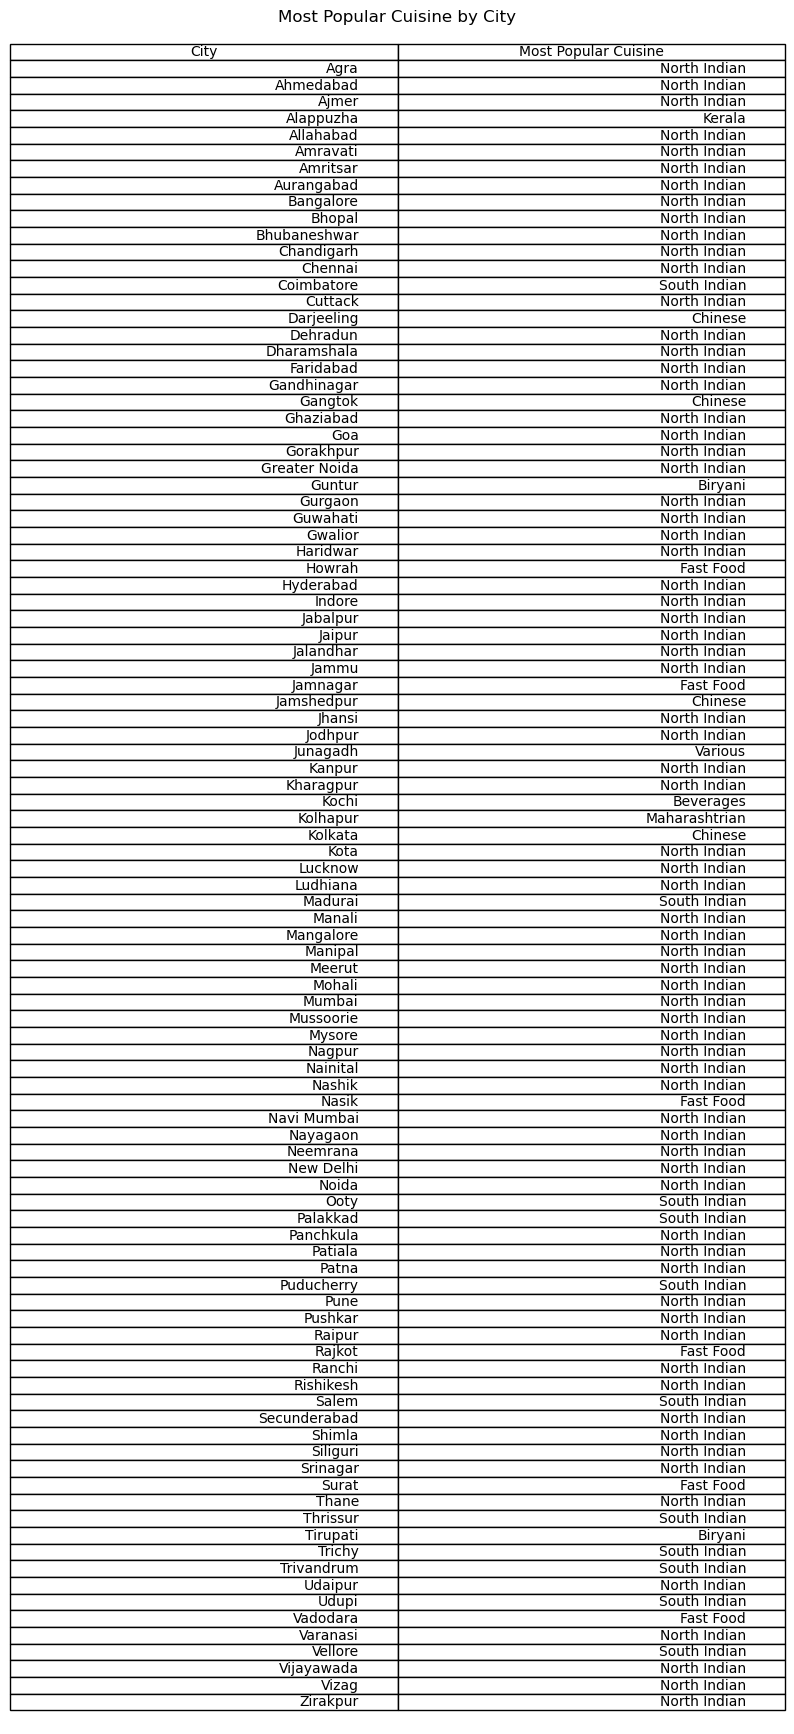

In [86]:
grouped_by_city = df.groupby('city')

popular_cuisines_by_city = {}

for city, city_data in grouped_by_city:
    all_cuisines = ', '.join(city_data['cuisines'])
    individual_cuisines = all_cuisines.split(', ')
    cuisine_counts = {}
    for cuisine in individual_cuisines:
        if cuisine in cuisine_counts:
            cuisine_counts[cuisine] += 1
        else:
            cuisine_counts[cuisine] = 1
            
    sorted_cuisines = sorted(cuisine_counts.items(), key=lambda x: x[1], reverse=True)

    popular_cuisines_by_city[city] = sorted_cuisines[0][0]

city_names = list(popular_cuisines_by_city.keys())
popular_cuisines = list(popular_cuisines_by_city.values())

fig, ax = plt.subplots(figsize=(10, 22))
table_data = [[city, cuisine] for city, cuisine in zip(city_names, popular_cuisines)]

ax.table(cellText=table_data, colLabels=['City', 'Most Popular Cuisine'], loc='center')
ax.axis('off')  # Hide axis

plt.title('Most Popular Cuisine by City')
plt.show()


In [89]:
# Relationship between restaurant ratings, price range, and popularity
correlation_matrix = df[['price_range', 'aggregate_rating', 'votes']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  price_range  aggregate_rating     votes
price_range          1.000000          0.252312  0.245646
aggregate_rating     0.252312          1.000000  0.283373
votes                0.245646          0.283373  1.000000


#  Competitive Analysis

In [68]:
# Identify major competitors in each city based on cuisine.
cuisine_counts = df['cuisines'].value_counts()
top_cuisines = cuisine_counts.head(5).index  

major_competitors = {}
for cuisine in top_cuisines:
    cuisine_df = df[df['cuisines'] == cuisine]
    grouped_by_city = cuisine_df.groupby('city')
    major_competitors[cuisine] = {}
    for city, city_group in grouped_by_city:
        top_restaurants = city_group.sort_values(by='aggregate_rating', ascending=False).head(3)  # Choose the top competitors
        major_competitors[cuisine][city] = top_restaurants['name'].tolist()
for cuisine, competitors_by_city in major_competitors.items():
    print(f"Major Competitors for Cuisine: {cuisine}")
    for city, competitors in competitors_by_city.items():
        print(f"\t{city}: {', '.join(competitors)}")

Major Competitors for Cuisine: North Indian
	Agra: Amritsari Kulcha Junction, Jain Bhojnalaya, Q'sinn
	Ahmedabad: Jassi De Parathe, Bayleaf - Courtyard By Marriott, Stuff's Food
	Ajmer: Guddan Ka Dhaba, The Big Bunny, Chatkaraa
	Allahabad: Eat On, Makkhan's, Spicy Bite
	Amravati: New Eagle Restaurant, Al Basheer Restaurant, Sahuji Ka Dhaba
	Amritsar: Bhai Kulwant Singh Kulchian Wale, Kesar Da Dhabha, Charming Chicken
	Aurangabad: Bhoj Restaurant, Naivedya, Hotel Rana Veg Non Veg Restaurant
	Bangalore: Chulha Chauki Da Dhaba, Punjab Grill, Chulha Chauki Da Dhaba
	Bhopal: Kebabsville - Sayaji Hotel, 32 Degree North East, Under The Mango Tree - Jehan Numa Palace
	Bhubaneshwar: Sizzler, Milky Den Veg Restaurant, Mirch Masala - Hotel Marrion
	Chandigarh: Hall Gate, Pirates of Grill, Dera - Taj Chandigarh
	Chennai: Bhangra, Dhaba Estd 1986 Delhi, Dialogue In The Dark
	Coimbatore: GoParatha, Night Out, The Afghan Grill - The Residency Hotel
	Cuttack: Hot Curry, Hotel Asha, Dal-Chini
	Darjeeli

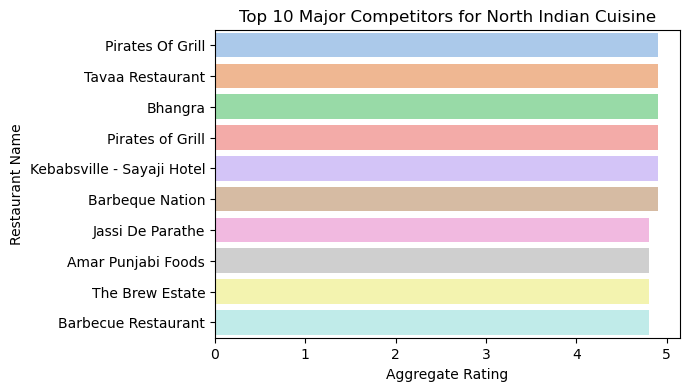

In [101]:
north_indian_df = df[df['cuisines'] == 'North Indian']

top_north_indian_restaurants = north_indian_df.sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='aggregate_rating', y='name', data=top_north_indian_restaurants, palette='pastel')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Major Competitors for North Indian Cuisine')
plt.show()



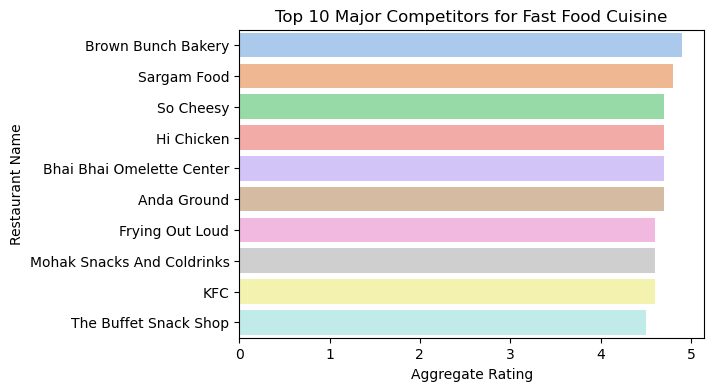

In [100]:
fast_food_df = df[df['cuisines'] == 'Fast Food']

top_fast_food_restaurants = fast_food_df.sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='aggregate_rating', y='name', data=top_fast_food_restaurants, palette='pastel')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Major Competitors for Fast Food Cuisine')
plt.show()

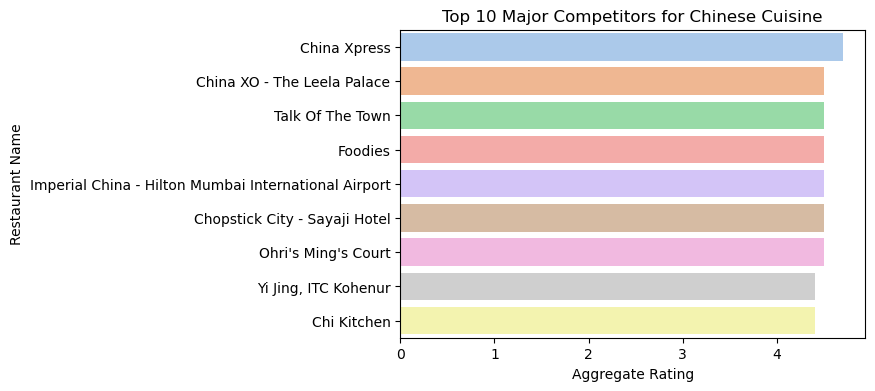

In [104]:
chinese_df = df[df['cuisines'] == 'Chinese']

top_chinese_restaurants = chinese_df.sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='aggregate_rating', y='name', data=top_chinese_restaurants, palette='pastel')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Major Competitors for Chinese Cuisine')
plt.show()

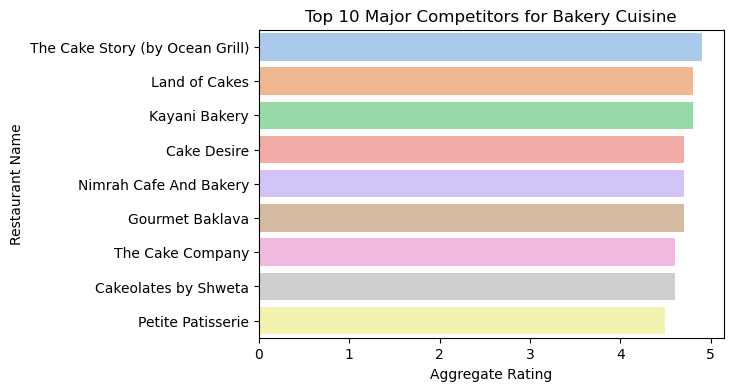

In [108]:
bakery_df = df[df['cuisines'] == 'Bakery']

top_bakery_restaurants = bakery_df.sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='aggregate_rating', y='name', data=top_bakery_restaurants, palette='pastel')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Major Competitors for Bakery Cuisine')
plt.show()

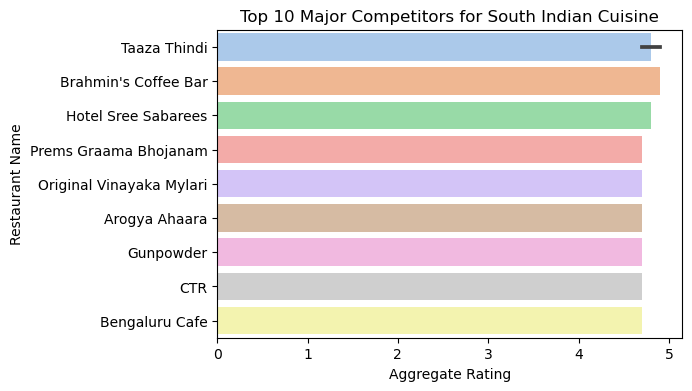

In [109]:
south_indian_df = df[df['cuisines'] == 'South Indian']

top_south_indian_restaurants = south_indian_df.sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='aggregate_rating', y='name', data=top_south_indian_restaurants, palette='pastel')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Major Competitors for South Indian Cuisine')
plt.show()

In [74]:
# Identify major competitors in each city based on pricing.
price_range_counts = df['price_range'].value_counts()
top_price_ranges = price_range_counts.head(5).index

major_competitors = {}
for price_range in top_price_ranges:
    price_range_df = df[df['price_range'] == price_range]
    grouped_by_city = price_range_df.groupby('city')
    major_competitors[price_range] = {}
    for city, city_group in grouped_by_city:
        top_restaurants = city_group.sort_values(by='aggregate_rating', ascending=False).head(3)
        major_competitors[price_range][city] = top_restaurants['name'].tolist()

for price_range, competitors_by_city in major_competitors.items():
    print(f"Major Competitors for Price Range: {price_range}")
    for city, competitors in competitors_by_city.items():
        print(f"\t{city}: {', '.join(competitors)}")

Major Competitors for Price Range: 1
	Agra: Sheroes Hangout, The Greener Side, MKOP
	Ahmedabad: Buttercupp, Lijjat Khaman, Pabrai's Fresh & Naturelle
	Ajmer: Foodies, Pandit Restaurant, Guddan Ka Dhaba
	Alappuzha: Halal Food Court, Cafe Pumpkin, Blueberry Shakes N Bakes
	Allahabad: Eat On, SCORE - The Games Cafe, Jaiswal Dosa Corner
	Amravati: Hotel Abdullah, New Eagle Restaurant, New Punjabi Dhaba & Restaurant
	Amritsar: Bhai Kulwant Singh Kulchian Wale, Gurdas Ram Jalebi Wala, Kanha Sweets
	Aurangabad: Gayatri Mewad, Natural Ice Cream, Sai Prasad
	Bangalore: Milano Ice Cream, Brahmin's Coffee Bar, Taaza Thindi
	Bhopal: MoShik's Homemade Chocolates, Gujrat Cold Drinks, Sagar Gaire Fast Food
	Bhubaneshwar: Mad Moose Artisan Gelato, Biggies Burger 'n' More, BOCCA Cafe
	Chandigarh: Milkshake and Co., Softy Corner, The Last Course
	Chennai: Momo Sa-Khang by Kailash Kitchen, Bombay Lassi, Prems Graama Bhojanam
	Coimbatore: Shree Anandhaas, Shree Anandhaas, Cream Stone
	Cuttack: Jugaad Jn, 

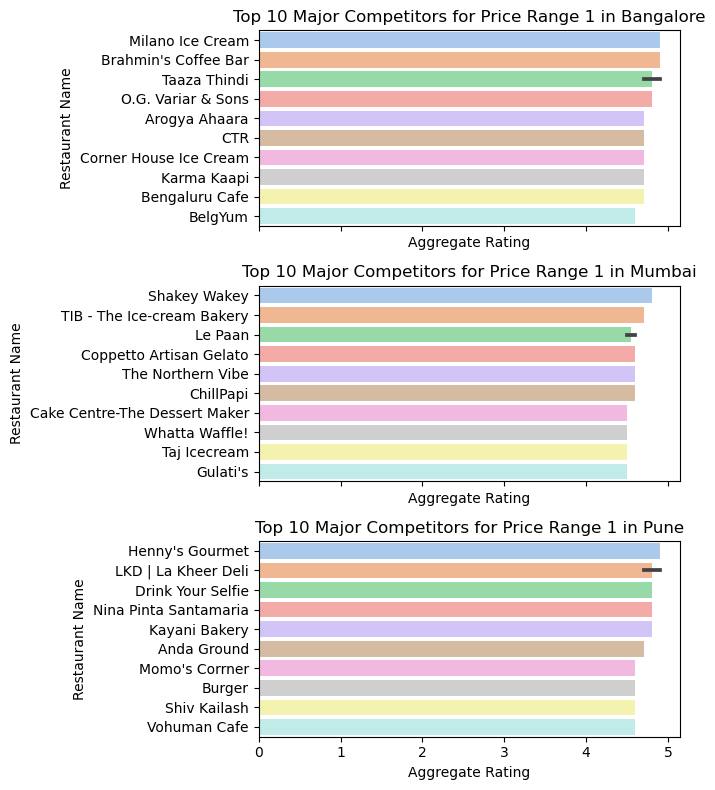

In [125]:
price_range_1_df = df[df['price_range'] == 1]

top_3_cities = df['city'].value_counts().head(3).index
top_competitors_by_city = {}

for city in top_3_cities:
    city_df = price_range_1_df[price_range_1_df['city'] == city]
    top_competitors = city_df.sort_values(by='aggregate_rating', ascending=False).head(11)
    top_competitors_by_city[city] = top_competitors

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True)

for i, (city, top_competitors) in enumerate(top_competitors_by_city.items()):
    sns.barplot(x='aggregate_rating', y='name', data=top_competitors, ax=axs[i], palette='pastel')
    axs[i].set_title(f"Top 10 Major Competitors for Price Range 1 in {city}")
    axs[i].set_xlabel("Aggregate Rating")
    axs[i].set_ylabel("Restaurant Name")

plt.tight_layout()
plt.show()

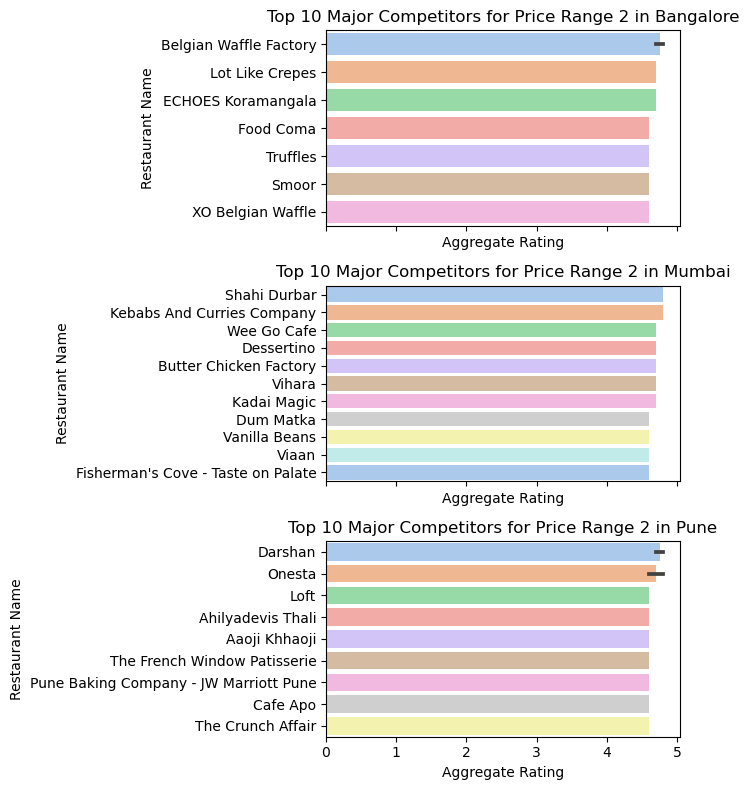

In [126]:
price_range_2_df = df[df['price_range'] == 2]

top_3_cities = df['city'].value_counts().head(3).index
top_competitors_by_city = {}

for city in top_3_cities:
    city_df = price_range_2_df[price_range_2_df['city'] == city]
    top_competitors = city_df.sort_values(by='aggregate_rating', ascending=False).head(11)
    top_competitors_by_city[city] = top_competitors

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True)

for i, (city, top_competitors) in enumerate(top_competitors_by_city.items()):
    sns.barplot(x='aggregate_rating', y='name', data=top_competitors, ax=axs[i], palette='pastel')
    axs[i].set_title(f"Top 10 Major Competitors for Price Range 2 in {city}")
    axs[i].set_xlabel("Aggregate Rating")
    axs[i].set_ylabel("Restaurant Name")

plt.tight_layout()
plt.show()

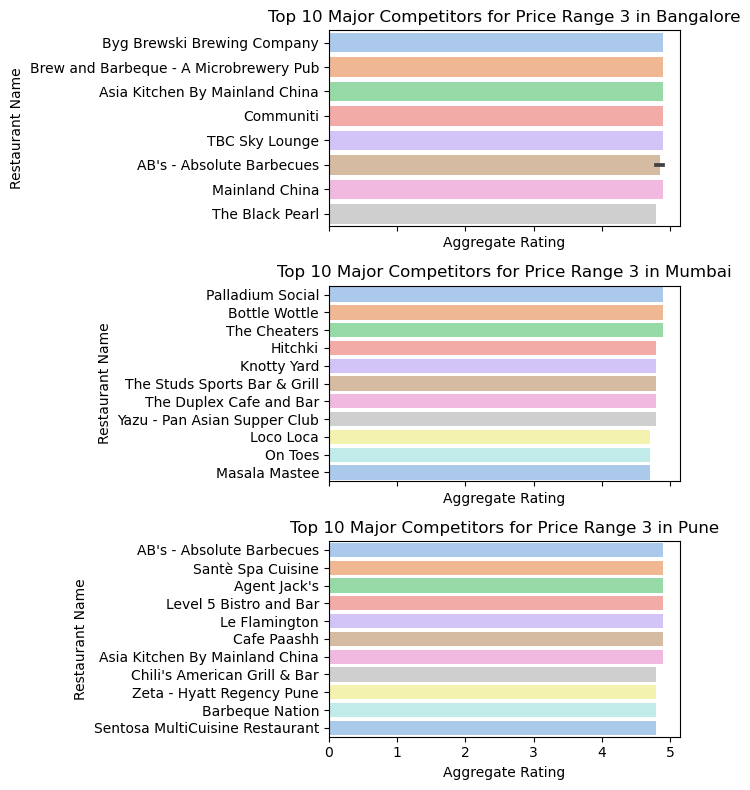

In [127]:
price_range_3_df = df[df['price_range'] == 3]

top_3_cities = df['city'].value_counts().head(3).index
top_competitors_by_city = {}

for city in top_3_cities:
    city_df = price_range_3_df[price_range_3_df['city'] == city]
    top_competitors = city_df.sort_values(by='aggregate_rating', ascending=False).head(11)
    top_competitors_by_city[city] = top_competitors

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True)

for i, (city, top_competitors) in enumerate(top_competitors_by_city.items()):
    sns.barplot(x='aggregate_rating', y='name', data=top_competitors, ax=axs[i], palette='pastel')
    axs[i].set_title(f"Top 10 Major Competitors for Price Range 3 in {city}")
    axs[i].set_xlabel("Aggregate Rating")
    axs[i].set_ylabel("Restaurant Name")

plt.tight_layout()
plt.show()

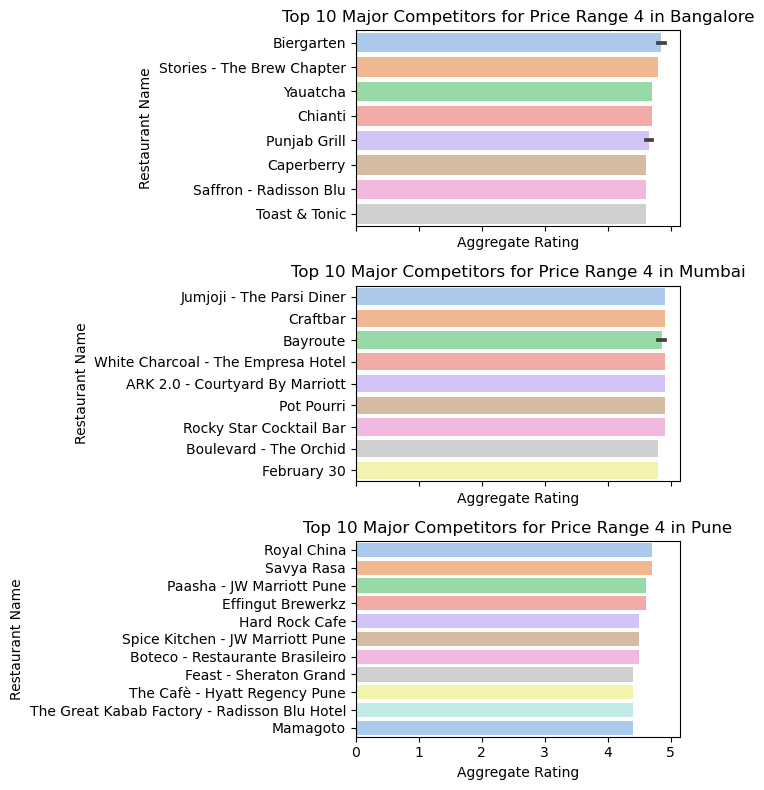

In [128]:
price_range_4_df = df[df['price_range'] == 4]

top_3_cities = df['city'].value_counts().head(3).index
top_competitors_by_city = {}

for city in top_3_cities:
    city_df = price_range_4_df[price_range_4_df['city'] == city]
    top_competitors = city_df.sort_values(by='aggregate_rating', ascending=False).head(11)
    top_competitors_by_city[city] = top_competitors

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True)

for i, (city, top_competitors) in enumerate(top_competitors_by_city.items()):
    sns.barplot(x='aggregate_rating', y='name', data=top_competitors, ax=axs[i], palette='pastel')
    axs[i].set_title(f"Top 10 Major Competitors for Price Range 4 in {city}")
    axs[i].set_xlabel("Aggregate Rating")
    axs[i].set_ylabel("Restaurant Name")

plt.tight_layout()
plt.show()

In [71]:
# Identify major competitors in each city based on ratings.
grouped_by_city = df.groupby('city')
major_competitors = {}
for city, city_group in grouped_by_city:
    top_restaurants = city_group.sort_values(by='aggregate_rating', ascending=False).head(3) 
    major_competitors[city] = top_restaurants['name'].tolist()

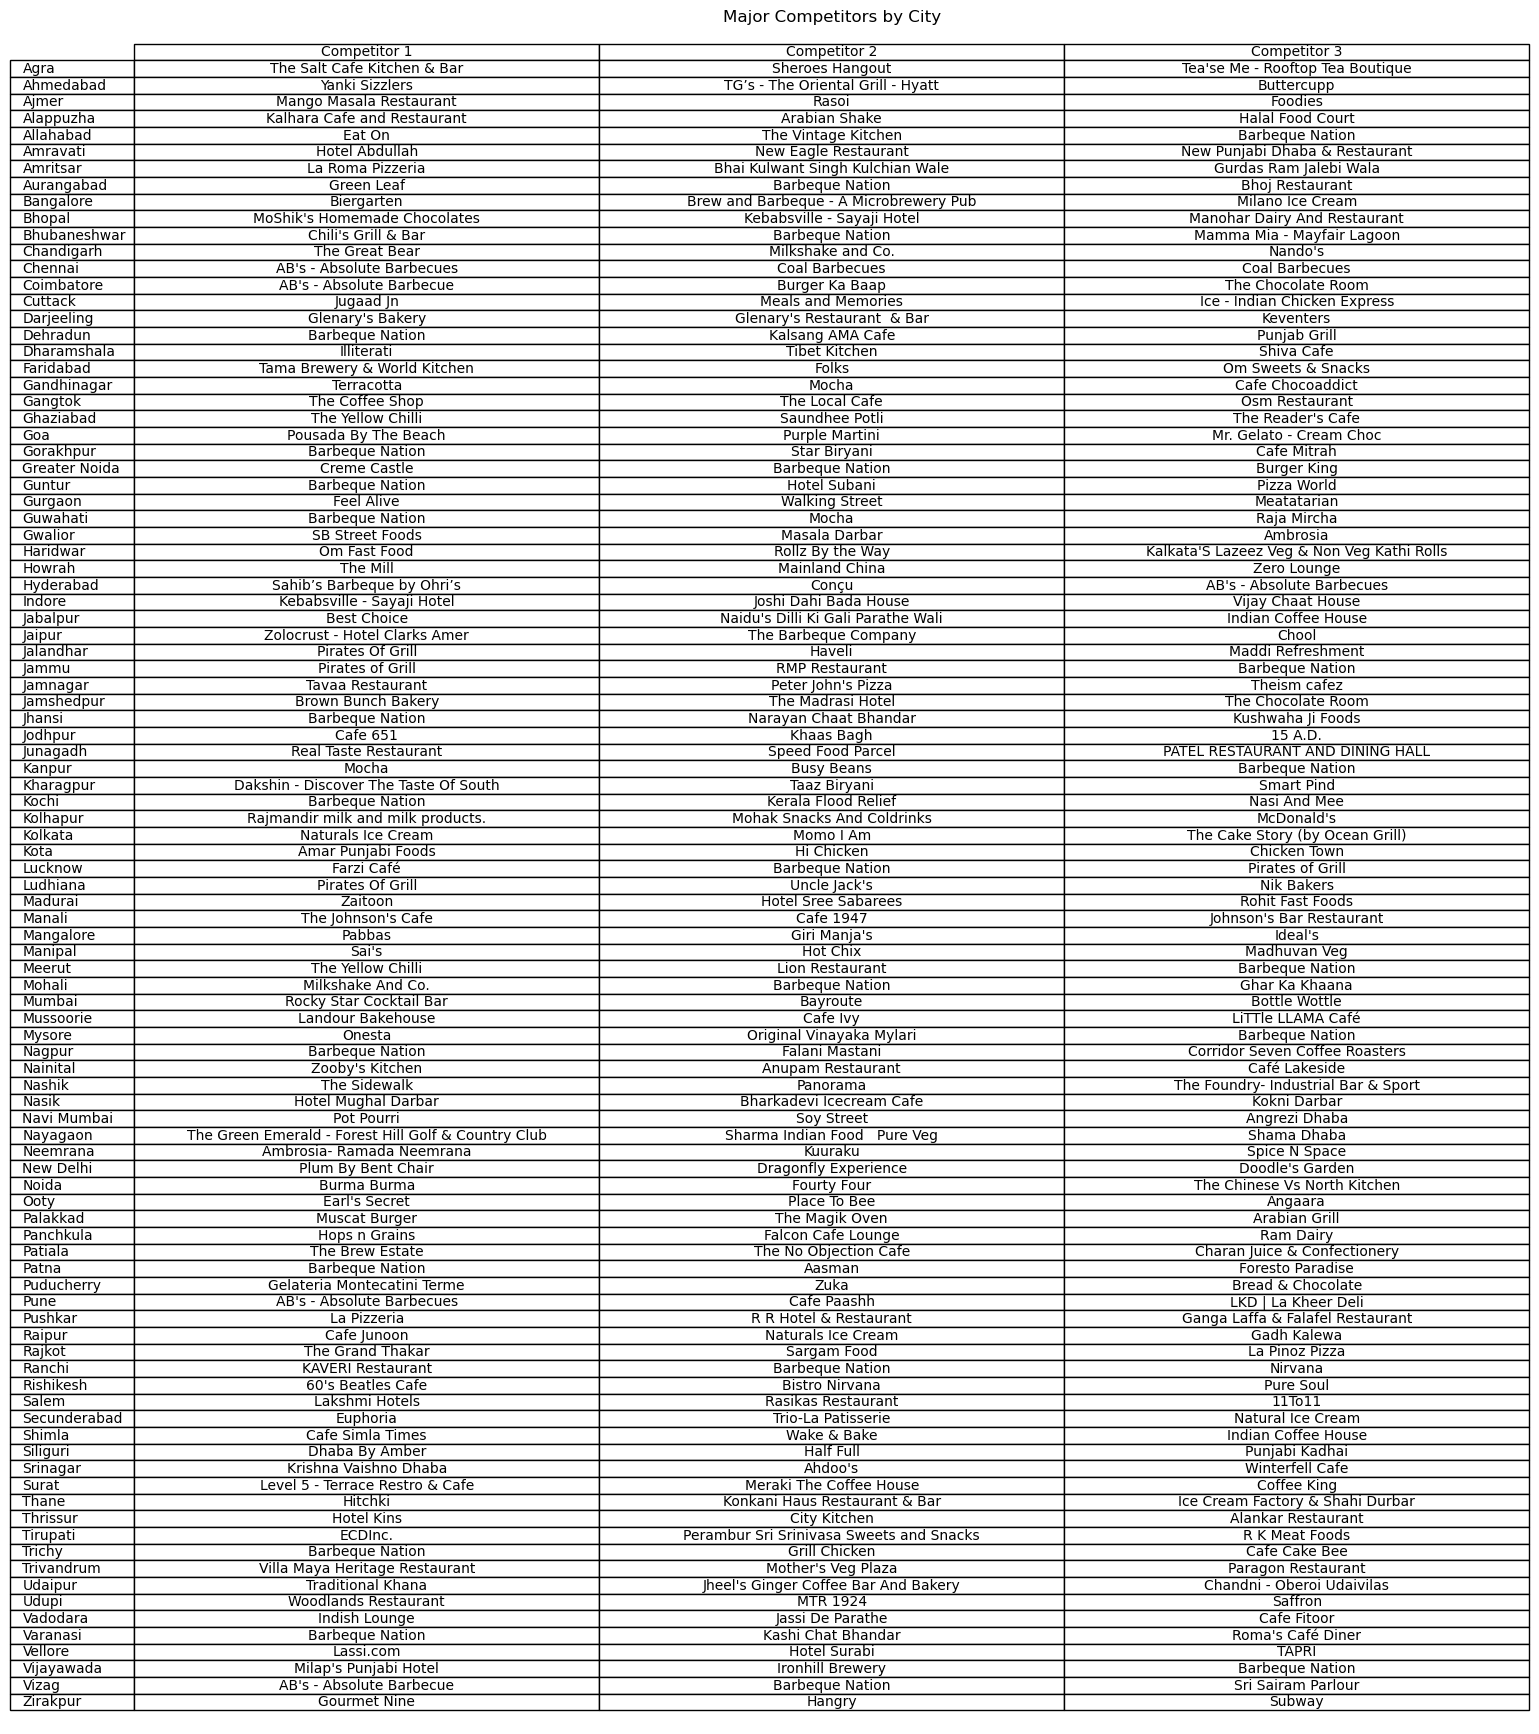

In [72]:
cities = list(major_competitors.keys())
competitor_lists = list(major_competitors.values())

plt.figure(figsize=(18, 22))
plt.table(cellText=competitor_lists,
          rowLabels=cities,
          colLabels=["Competitor 1", "Competitor 2", "Competitor 3"],
          cellLoc='center',
          loc='center')
plt.axis('off')
plt.title('Major Competitors by City')
plt.show()

#  Market Gap Analysis

In [131]:
from collections import Counter

all_cuisines = ', '.join(df['cuisines'])
individual_cuisines = all_cuisines.split(', ')

cuisine_counts = Counter(individual_cuisines)

sorted_cuisines = sorted(cuisine_counts.items(), key=lambda x: x[1])

least_popular_cuisines = sorted_cuisines[:5]
print("By offering these cuisines, the restaurant chain can attract customers looking for unique dining experiences.")
print("Least Popular cuisines:")
for cuisine, count in least_popular_cuisines:
    print(f"{cuisine}: {count} restaurants")

By offering these cuisines, the restaurant chain can attract customers looking for unique dining experiences.
Least Popular cuisines:
Mandi: 1 restaurants
International: 1 restaurants
Swedish: 1 restaurants
Vegan: 1 restaurants
Pan Asian: 2 restaurants


# End of Notebook